### 4. You have two low-quality images (`2_1.jpg`, `2_3.jpg`) that you want to enhance. 
You will be examining the following three general histogram-based enhancement algorithms:
* a. Linear stretching;
* b. Histogram equalization;
* c. Histogram specification \
For each image and each method, please submit the original and the new image after processing.
For original and new image, please also include their histogram and `cdf` plots for you to get a better understanding of what’s going on with these processing in regard with the image histogram. Compare the effects of these methods. For each image, please comment on the effects and pick up one method that you think works best for that image. \
 **HINTS**:
1. You need to implement your own functions for linear stretching, histogram equalization and specification. But you may use these commands to help you: `rgb2hsv`, `hsv2rgb`, `subplot`, `imshow`, `cumsum`, `imhist`
2. You may want to convert the image to HSV first before doing any operations; specifically, you want to process the V channel (value, i.e., intensity) only. After the V channel is altered, you want to combine it with original H and S channel and convert back to RGB.
3. For histogram equalization, compute `pdf` and `cdf` first and then use the `cdf` as the transform function. You can use imhist to help you get the image histogram and then use cumsum to get the cdf from histogram, but please DON’T use histeq to directly perform histogram equalization / specification.
4. For histogram specification, you may specify any histogram to get the best result. Note that if you specify the target histogram as a uniform distribution, you’re doing histogram equalization. You can also try normal distribution as the specified histogram to get the transform function and see how the result turns out. Use normpdf to generate a normally distributed sequence in MATLAB. Please type help normpdf to see how to

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

In [2]:
img_21_path = '/home/ngtuetam/workspace/DIP_2022/assignment_2/images/2_1.jpg'
img_23_path = '/home/ngtuetam/workspace/DIP_2022/assignment_2/images/2_3.jpg'

In [3]:
img_21 = cv2.imread(img_21_path)
img_23 = cv2.imread(img_23_path)

In [4]:
Intensity = np.arange(0,256)

In [5]:
def plot_hist(img):
    h = np.zeros((256))
    rows,cols,d = img.shape
    for i in range(rows):
        for j in range(cols):
            h[img[i,j]] = h[img[i,j]] +1
    return h

## a. Linear stretching

In [17]:
def linear_stretching(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h_img,s_img,v_img = hsv_img[:,:,0], hsv_img[:,:,1], hsv_img[:,:,2]
    v_equal = np.zeros_like(v_img)
    for i in range(v_img.shape[0]):
        for j in range(v_img.shape[1]):
            v_equal[i,j] = 255*(v_img[i,j]-np.min(v_img))/(np.max(v_img)-np.min(v_img))

    hsv_image = cv2.merge([h_img, s_img, v_equal])
    bgr_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    
    return rgb_image

Text(0.5, 1.0, 'Image 2_1 nomalized histogram')

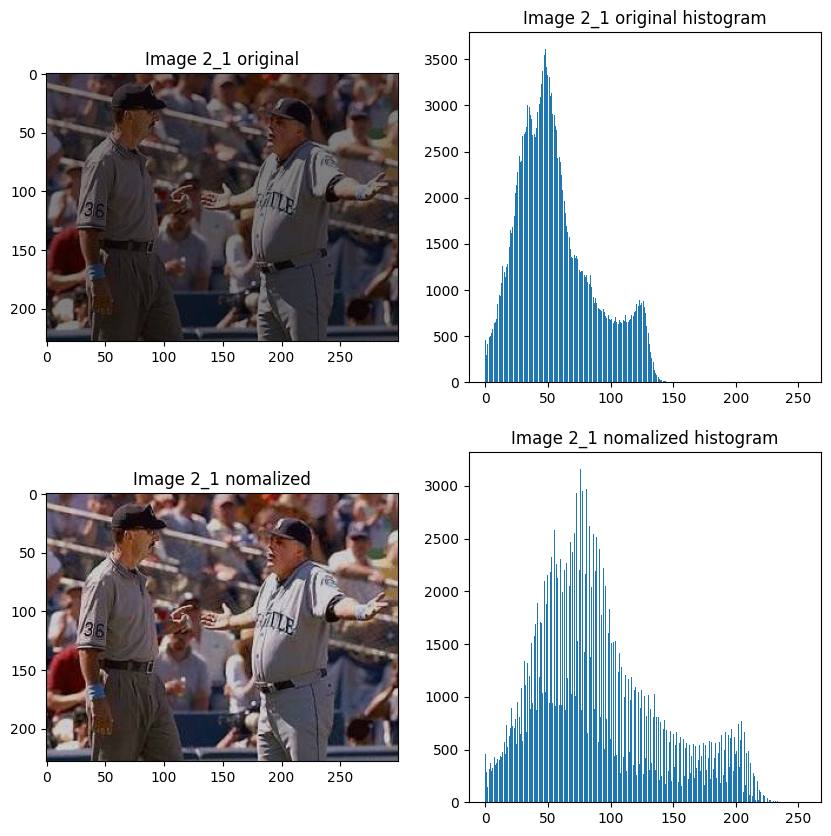

In [18]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img_21, cv2.COLOR_BGR2RGB))
plt.title('Image 2_1 original')
plt.subplot(2,2,2)
plt.bar(Intensity,plot_hist(img_21))
plt.title('Image 2_1 original histogram')
plt.subplot(2,2,3)
plt.imshow(linear_stretching(img_21))
plt.title('Image 2_1 nomalized')
plt.subplot(2,2,4)
plt.bar(Intensity,plot_hist(linear_stretching(img_21)))
plt.title('Image 2_1 nomalized histogram')

Text(0.5, 1.0, 'Image 2_3 nomalized histogram')

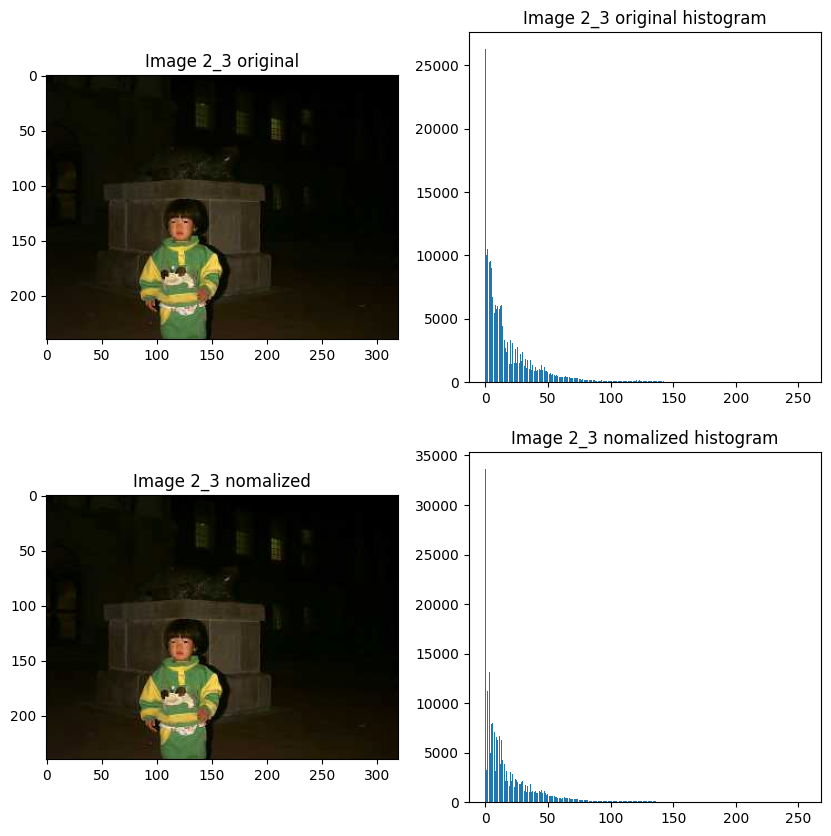

In [19]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img_23, cv2.COLOR_BGR2RGB))
plt.title('Image 2_3 original')
plt.subplot(2,2,2)
plt.bar(Intensity,plot_hist(img_23))
plt.title('Image 2_3 original histogram')
plt.subplot(2,2,3)
plt.imshow(linear_stretching(img_23))
plt.title('Image 2_3 nomalized')
plt.subplot(2,2,4)
plt.bar(Intensity,plot_hist(linear_stretching(img_23)))
plt.title('Image 2_3 nomalized histogram')

## b. Histogram equalization

In [13]:
def histogram_equalization(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h_img,s_img,v_img = hsv_img[:,:,0], hsv_img[:,:,1], hsv_img[:,:,2]
#   h_img,s_img,v_img = cv2.split(hsv_img)

    h = np.zeros((256))
    rows,cols = v_img.shape
    v_equal = np.zeros_like(v_img)
    for i in range(rows):
        for j in range(cols):
            h[v_img[i,j]] = h[v_img[i,j]] +1

    p = h / (rows*cols)     #probability density function
    
    cdf = p[0]              #cumulative distribution function
    p[0] = 255*cdf

    for i in range(1,256):
        cdf += p[i]
        p[i] = 255*cdf
        
    for i in range (rows):
        for j in range (cols):
            v_equal[i,j] = p[v_img[i,j]]
            
    hsv_image = cv2.merge([h_img, s_img, v_equal])
    bgr_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    return rgb_image

Text(0.5, 1.0, 'Image 2_1 nomalized histogram')

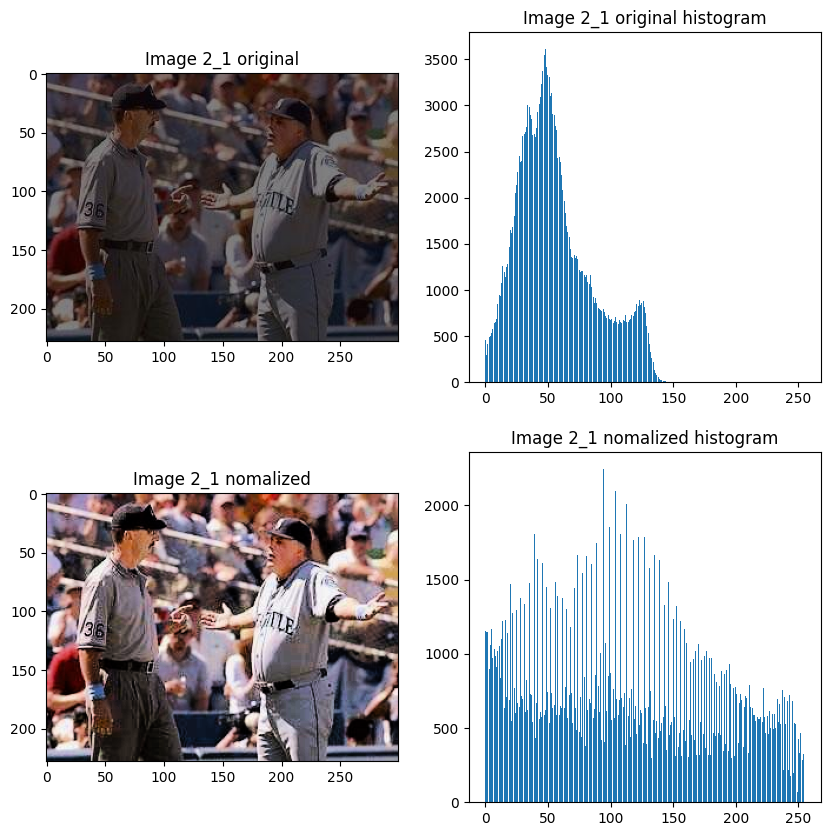

In [14]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img_21, cv2.COLOR_BGR2RGB))
plt.title('Image 2_1 original')
plt.subplot(2,2,2)
plt.bar(Intensity,plot_hist(img_21))
plt.title('Image 2_1 original histogram')
plt.subplot(2,2,3)
plt.imshow(histogram_equalization(img_21))
plt.title('Image 2_1 nomalized')
plt.subplot(2,2,4)
plt.bar(Intensity,plot_hist(histogram_equalization(img_21)))
plt.title('Image 2_1 nomalized histogram')

Text(0.5, 1.0, 'Image 2_3 nomalized histogram')

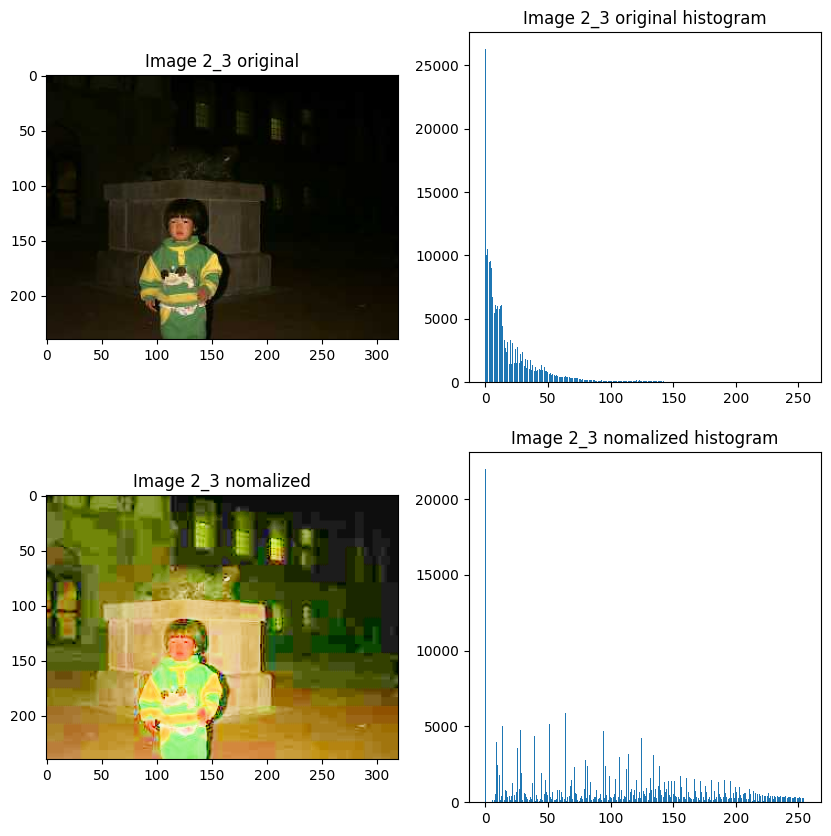

In [15]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img_23, cv2.COLOR_BGR2RGB))
plt.title('Image 2_3 original')
plt.subplot(2,2,2)
plt.bar(Intensity,plot_hist(img_23))
plt.title('Image 2_3 original histogram')
plt.subplot(2,2,3)
plt.imshow(histogram_equalization(img_23))
plt.title('Image 2_3 nomalized')
plt.subplot(2,2,4)
plt.bar(Intensity,plot_hist(histogram_equalization(img_23)))
plt.title('Image 2_3 nomalized histogram')

In [16]:
np.max(histogram_equalization(img_23))

255

## c. Histogram specification